In [1]:
import sys

In [2]:
sys.path

['C:\\Users\\AndrejxD\\OneDrive\\Sola\\MLG',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\python38.zip',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\DLLs',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\lib',
 'C:\\Users\\AndrejxD\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0',
 '',
 'C:\\Users\\AndrejxD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages',
 'd:\\downloads\\sketchgraphs',
 'C:\\Users\\AndrejxD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\win32',
 'C:\\Users\\AndrejxD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\win3

315228
NodeOp(label=<EntityType.External: 7>, parameters={})
NodeOp(label=<EntityType.Circle: 2>, parameters={'isConstruction': True, 'clockwise': False, 'xCenter': 0.0, 'yCenter': 0.0, 'xDir': 1.0, 'yDir': 0.0, 'radius': 0.004041451884327372})
NodeOp(label=<SubnodeType.SN_Center: 103>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(2, 1), parameters={})
EdgeOp(label=<ConstraintType.Concentric: 15>, references=(2, 0), parameters={})
NodeOp(label=<EntityType.Line: 1>, parameters={'isConstruction': False, 'dirX': 0.0, 'dirY': -0.9999999999999999, 'pntX': -0.0035, 'pntY': -3.1785640014566326e-06, 'startParam': -0.0020239045061651445, 'endParam': 0.002017547378162232})
EdgeOp(label=<ConstraintType.Vertical: 6>, references=(3,), parameters={})
NodeOp(label=<SubnodeType.SN_Start: 101>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(4, 3), parameters={})
EdgeOp(label=<ConstraintType.Coincident: 0>, references=(4, 1), parameters={})
NodeOp(label=

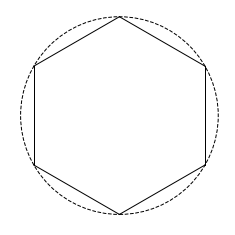

In [3]:
import sketchgraphs.data as datalib
import random
from sketchgraphs.data import flat_array
seq_data = flat_array.load_dictionary_flat('datasets/sg_t16_validation.npy')
print(len(seq_data['sequences']))

seq = seq_data['sequences'][random.randint(0, 315228)]
print(*seq[:20], sep='\n')
sketch = datalib.sketch_from_sequence(seq)
datalib.render_sketch(sketch);

In [51]:
import numpy as np
f = open("datasets/exported/test_save1.npz", "wb")
np.savez_compressed(f, seq_data['sequences'])
f.close()

In [47]:
testSaved = np.load("datasets/exported/test_save1.npz", allow_pickle=True)
print(testSaved['arr_0'], sep="\n")

[NodeOp(label=<EntityType.External: 7>, parameters={}), NodeOp(label=<EntityType.Circle: 2>, parameters={'isConstruction': False, 'clockwise': False, 'xCenter': 0.0, 'yCenter': 0.0, 'xDir': 1.0, 'yDir': 0.0, 'radius': 0.07468157776994294}), NodeOp(label=<SubnodeType.SN_Center: 103>, parameters={}), EdgeOp(label=<ConstraintType.Subnode: 101>, references=(2, 1), parameters={}), EdgeOp(label=<ConstraintType.Coincident: 0>, references=(2, 0), parameters={}), NodeOp(label=<EntityType.Circle: 2>, parameters={'isConstruction': False, 'clockwise': False, 'xCenter': 0.0, 'yCenter': 0.0, 'xDir': 1.0, 'yDir': 0.0, 'radius': 0.06665470513285787}), NodeOp(label=<SubnodeType.SN_Center: 103>, parameters={}), EdgeOp(label=<ConstraintType.Subnode: 101>, references=(4, 3), parameters={}), EdgeOp(label=<ConstraintType.Coincident: 0>, references=(4, 2), parameters={}), NodeOp(label=<EntityType.Stop: 8>, parameters={})]


NodeOp(label=<EntityType.External: 7>, parameters={})
NodeOp(label=<EntityType.Circle: 2>, parameters={'isConstruction': True, 'clockwise': False, 'xCenter': 0.0, 'yCenter': 0.0, 'xDir': 1.0, 'yDir': 0.0, 'radius': 0.004041451884327372})
NodeOp(label=<SubnodeType.SN_Center: 103>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(2, 1), parameters={})
EdgeOp(label=<ConstraintType.Concentric: 15>, references=(2, 0), parameters={})
NodeOp(label=<EntityType.Line: 1>, parameters={'isConstruction': False, 'dirX': 0.0, 'dirY': -0.9999999999999999, 'pntX': -0.0035, 'pntY': -3.1785640014566326e-06, 'startParam': -0.0020239045061651445, 'endParam': 0.002017547378162232})
EdgeOp(label=<ConstraintType.Vertical: 6>, references=(3,), parameters={})
NodeOp(label=<SubnodeType.SN_Start: 101>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(4, 3), parameters={})
EdgeOp(label=<ConstraintType.Coincident: 0>, references=(4, 1), parameters={})
NodeOp(label=<Subnod

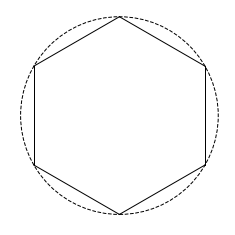

In [4]:
print(*seq, sep='\n')
sketch = datalib.sketch_from_sequence(seq)
datalib.render_sketch(sketch);

In [8]:
import os
!dir

 Volume in drive C has no label.
 Volume Serial Number is A872-D3C5

 Directory of C:\Users\AndrejxD\OneDrive\Sola\MLG

02/05/2023  07:34 PM    <DIR>          .
02/05/2023  07:34 PM    <DIR>          ..
02/05/2023  06:21 PM             1,841 .gitignore
02/05/2023  05:32 PM    <DIR>          .ipynb_checkpoints
02/05/2023  06:17 PM    <DIR>          datasets
02/05/2023  07:34 PM            26,646 MLGSketchbook.ipynb
02/05/2023  05:26 PM                13 README.md
               3 File(s)         28,500 bytes
               4 Dir(s)  67,338,362,880 bytes free
